# Análisis Exploratorio de Datos (EDA) - Predicción de Stroke

## Objetivo
Realizar un análisis exploratorio completo del dataset de salud para entender las características de los datos y preparar el terreno para el modelado predictivo.

## Dataset: Healthcare Stroke Data
- **Fuente**: Kaggle
- **Problema**: Clasificación binaria (Stroke: Sí/No)
- **Variables**: 11 características demográficas y médicas


In [9]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de visualizaciones
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Librerías importadas correctamente")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")


Librerías importadas correctamente
Pandas version: 2.1.4
NumPy version: 1.24.4
Matplotlib version: 3.8.2
Seaborn version: 0.13.0


## Información General del Dataset

Vista inicial del dataset con estadísticas básicas y estructura de datos.


In [10]:
# Cargar el dataset
df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

print(f"Forma del dataset: {df.shape}")
print(f"Número de registros: {df.shape[0]:,}")
print(f"Número de variables: {df.shape[1]}")
print()

print("Primeras 5 filas del dataset:")
df.head()


Forma del dataset: (5110, 12)
Número de registros: 5,110
Número de variables: 12

Primeras 5 filas del dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Análisis de Variables y Estadísticas Descriptivas

Examen detallado de los tipos de datos, información de variables y estadísticas descriptivas básicas.


In [11]:
# Información detallada del dataset
print("Información de variables:")
print(df.info())
print()

print("Estadísticas descriptivas:")
df.describe()


Información de variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

Estadísticas descriptivas:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Análisis de Valores Faltantes

Identificación y visualización de datos faltantes en el dataset, crucial para el preprocesamiento.


Variables con valores faltantes:
  Variable  Valores_Faltantes  Porcentaje
9      bmi                201    3.933464



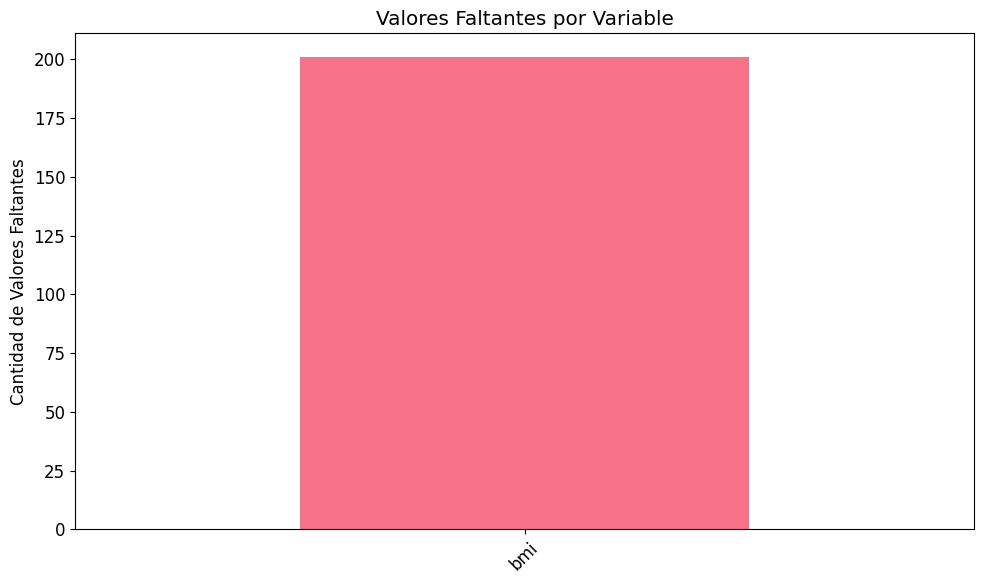

In [12]:
# Análisis de valores faltantes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Variable': missing_data.index,
    'Valores_Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
})

print("Variables con valores faltantes:")
print(missing_df[missing_df['Valores_Faltantes'] > 0])
print()

# Visualización de valores faltantes
if missing_data.sum() > 0:
    plt.figure(figsize=(10, 6))
    missing_data[missing_data > 0].plot(kind='bar')
    plt.title('Valores Faltantes por Variable')
    plt.ylabel('Cantidad de Valores Faltantes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No hay valores faltantes en el dataset")


## Análisis de la Variable Objetivo (Stroke)

Distribución de la variable objetivo, identificando el desbalance de clases que es crítico para el modelado.


Distribución de casos de stroke:
Sin stroke (0): 4,861 casos (95.1%)
Con stroke (1): 249 casos (4.9%)



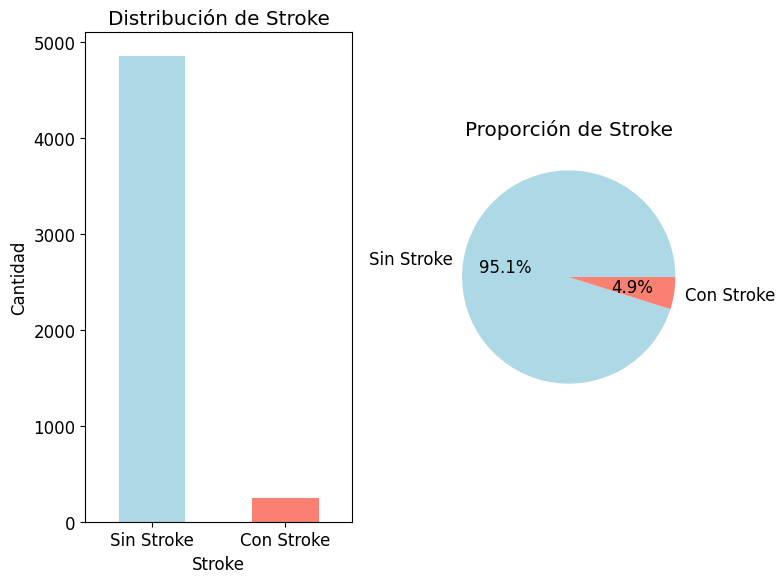

NOTA: El dataset está desbalanceado. Solo el 4.9% de los casos presentan stroke.


In [13]:
# Análisis de la variable objetivo (stroke)
stroke_counts = df['stroke'].value_counts()
stroke_percent = df['stroke'].value_counts(normalize=True) * 100

print("Distribución de casos de stroke:")
print(f"Sin stroke (0): {stroke_counts[0]:,} casos ({stroke_percent[0]:.1f}%)")
print(f"Con stroke (1): {stroke_counts[1]:,} casos ({stroke_percent[1]:.1f}%)")
print()

# Visualización de la distribución
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
stroke_counts.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribución de Stroke')
plt.xlabel('Stroke')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Sin Stroke', 'Con Stroke'], rotation=0)

plt.subplot(1, 2, 2)
plt.pie(stroke_counts.values, labels=['Sin Stroke', 'Con Stroke'], 
        autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Proporción de Stroke')

plt.tight_layout()
plt.show()

print("NOTA: El dataset está desbalanceado. Solo el 4.9% de los casos presentan stroke.")


## Análisis de Variables Categóricas

Distribución y características de todas las variables categóricas del dataset.


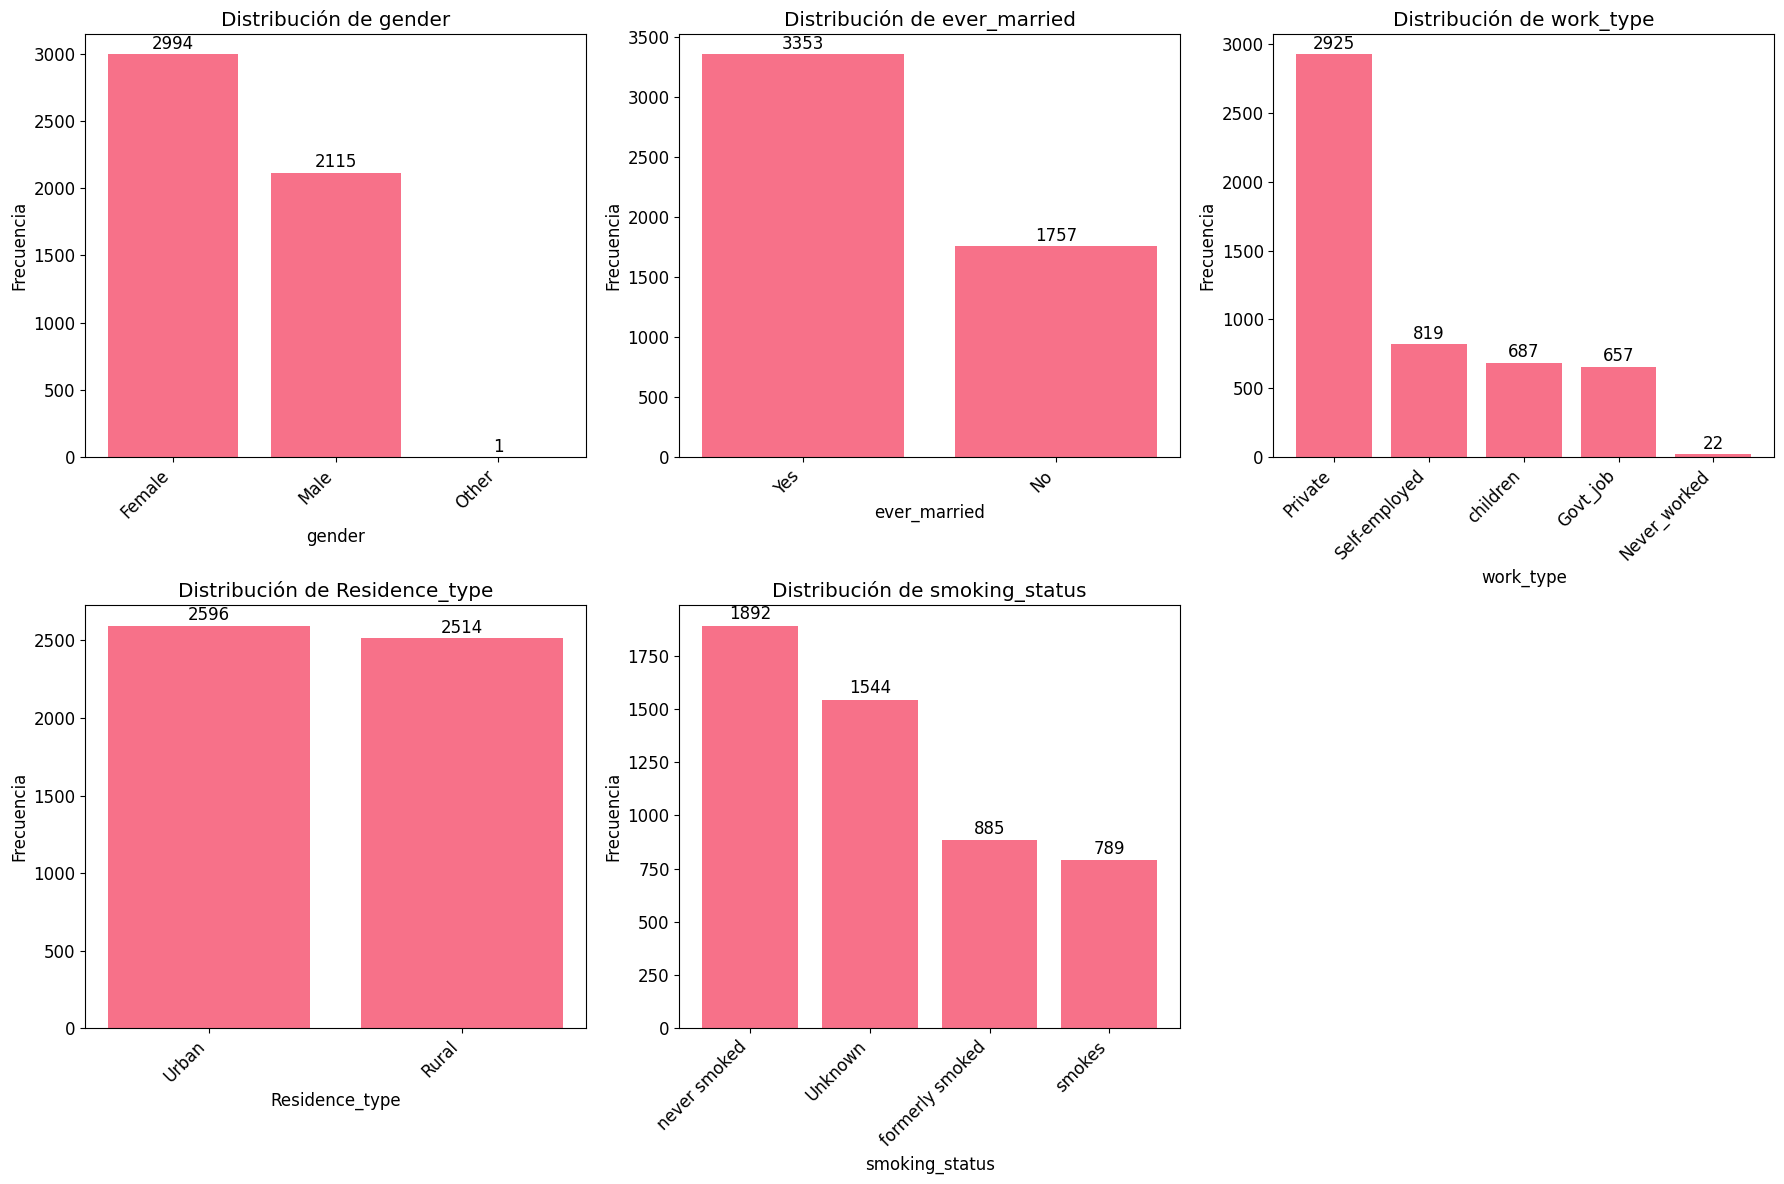


GENDER:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
Valores únicos: 3

EVER_MARRIED:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
Valores únicos: 2

WORK_TYPE:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Valores únicos: 5

RESIDENCE_TYPE:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
Valores únicos: 2

SMOKING_STATUS:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
Valores únicos: 4


In [14]:
# Análisis de variables categóricas
categorical_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(categorical_vars):
    if i < len(axes):
        # Conteo de valores
        counts = df[var].value_counts()
        
        # Gráfico de barras
        axes[i].bar(range(len(counts)), counts.values)
        axes[i].set_title(f'Distribución de {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frecuencia')
        axes[i].set_xticks(range(len(counts)))
        axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
        
        # Agregar valores en las barras
        for j, v in enumerate(counts.values):
            axes[i].text(j, v + 10, str(v), ha='center', va='bottom')

# Ocultar el último subplot si no se usa
if len(categorical_vars) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

# Mostrar estadísticas de cada variable categórica
for var in categorical_vars:
    print(f"\n{var.upper()}:")
    print(df[var].value_counts())
    print(f"Valores únicos: {df[var].nunique()}")


## Análisis de Variables Numéricas

Distribución y estadísticas de las variables numéricas, incluyendo identificaciones de outliers y patrones.


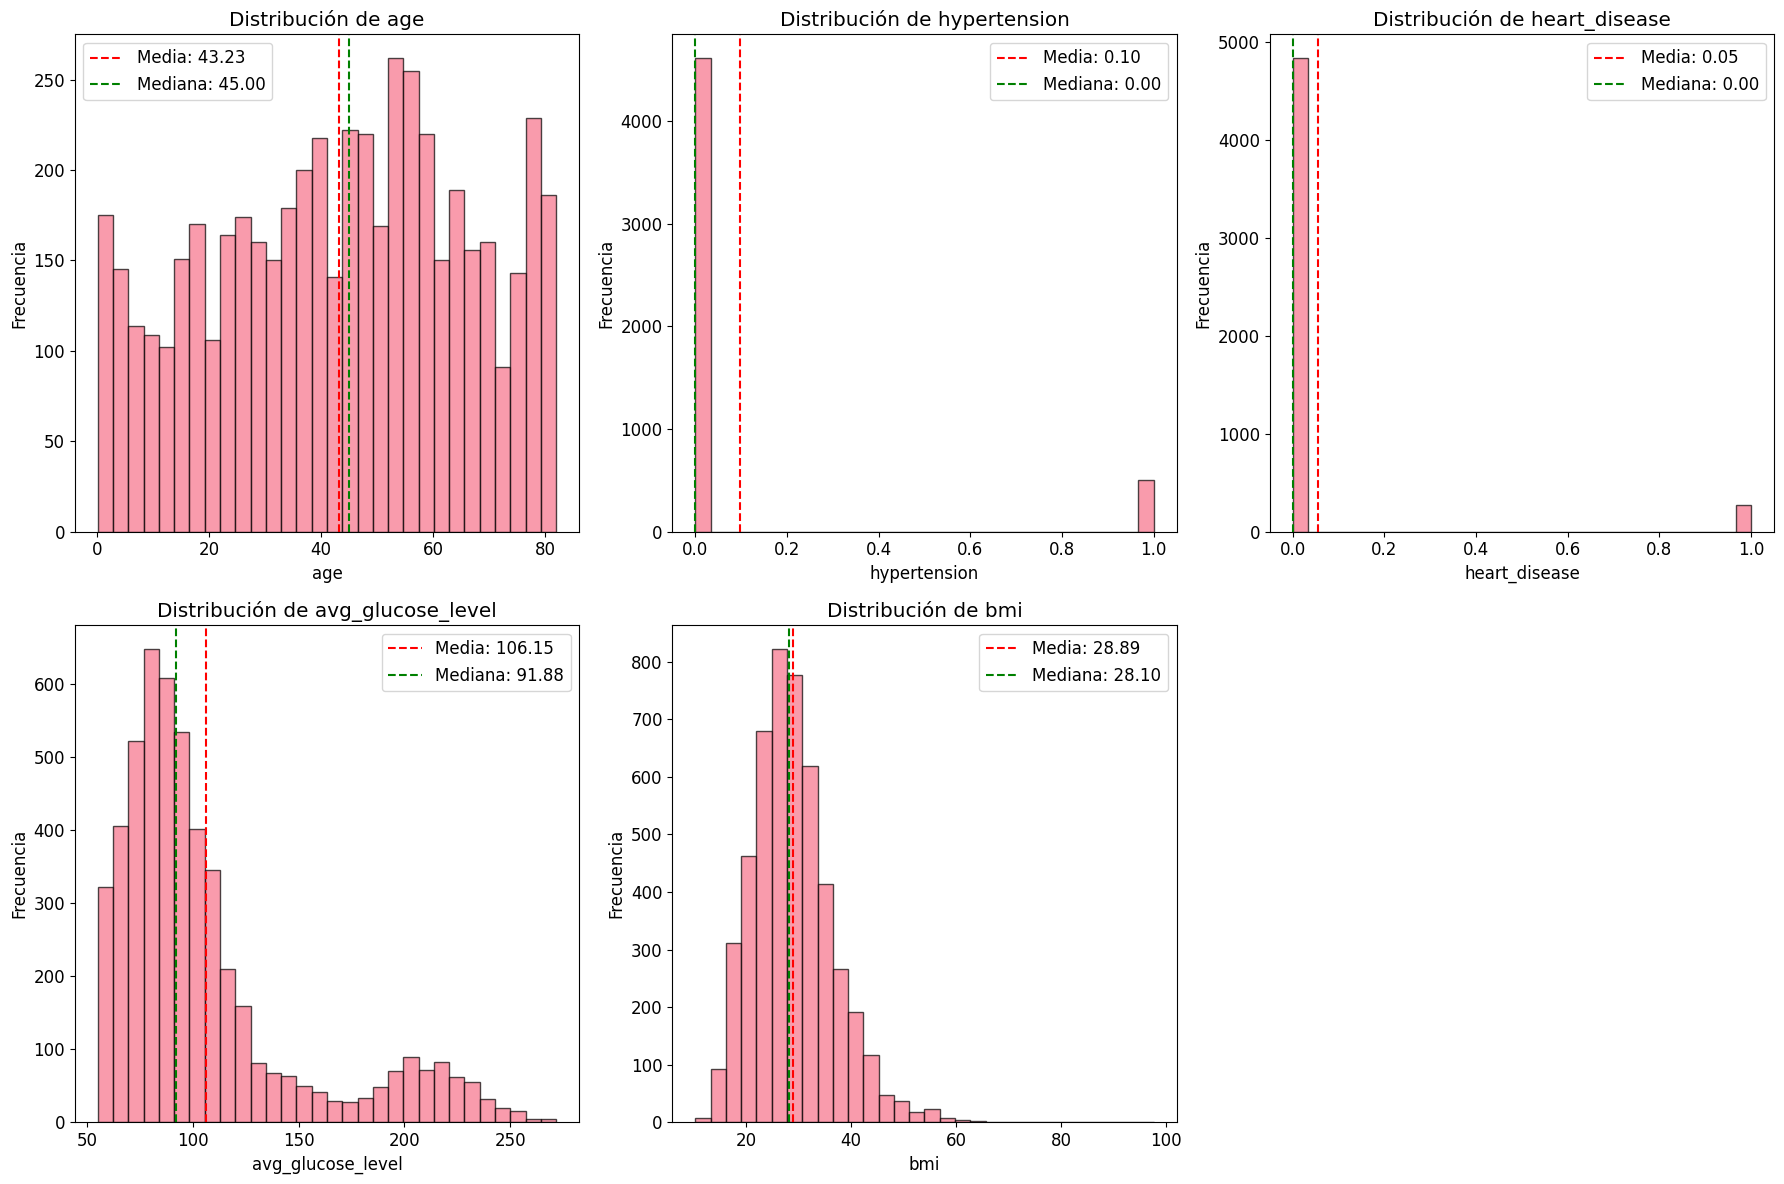


Estadísticas de variables numéricas:

AGE:
  Media: 43.23
  Mediana: 45.00
  Desviación estándar: 22.61
  Mínimo: 0.08
  Máximo: 82.00
  Valores faltantes: 0

HYPERTENSION:
  Media: 0.10
  Mediana: 0.00
  Desviación estándar: 0.30
  Mínimo: 0.00
  Máximo: 1.00
  Valores faltantes: 0

HEART_DISEASE:
  Media: 0.05
  Mediana: 0.00
  Desviación estándar: 0.23
  Mínimo: 0.00
  Máximo: 1.00
  Valores faltantes: 0

AVG_GLUCOSE_LEVEL:
  Media: 106.15
  Mediana: 91.88
  Desviación estándar: 45.28
  Mínimo: 55.12
  Máximo: 271.74
  Valores faltantes: 0

BMI:
  Media: 28.89
  Mediana: 28.10
  Desviación estándar: 7.85
  Mínimo: 10.30
  Máximo: 97.60
  Valores faltantes: 201


In [15]:
# Análisis de variables numéricas
numerical_vars = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(numerical_vars):
    if i < len(axes):
        # Histograma
        axes[i].hist(df[var].dropna(), bins=30, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribución de {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frecuencia')
        
        # Agregar estadísticas
        mean_val = df[var].mean()
        median_val = df[var].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')
        axes[i].legend()

# Ocultar el último subplot si no se usa
if len(numerical_vars) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

# Estadísticas detalladas
print("\nEstadísticas de variables numéricas:")
for var in numerical_vars:
    print(f"\n{var.upper()}:")
    print(f"  Media: {df[var].mean():.2f}")
    print(f"  Mediana: {df[var].median():.2f}")
    print(f"  Desviación estándar: {df[var].std():.2f}")
    print(f"  Mínimo: {df[var].min():.2f}")
    print(f"  Máximo: {df[var].max():.2f}")
    print(f"  Valores faltantes: {df[var].isnull().sum()}")


## Análisis de Correlación y Relaciones

Análisis de correlaciones entre variables numéricas y relaciones entre variables categóricas y la variable objetivo.


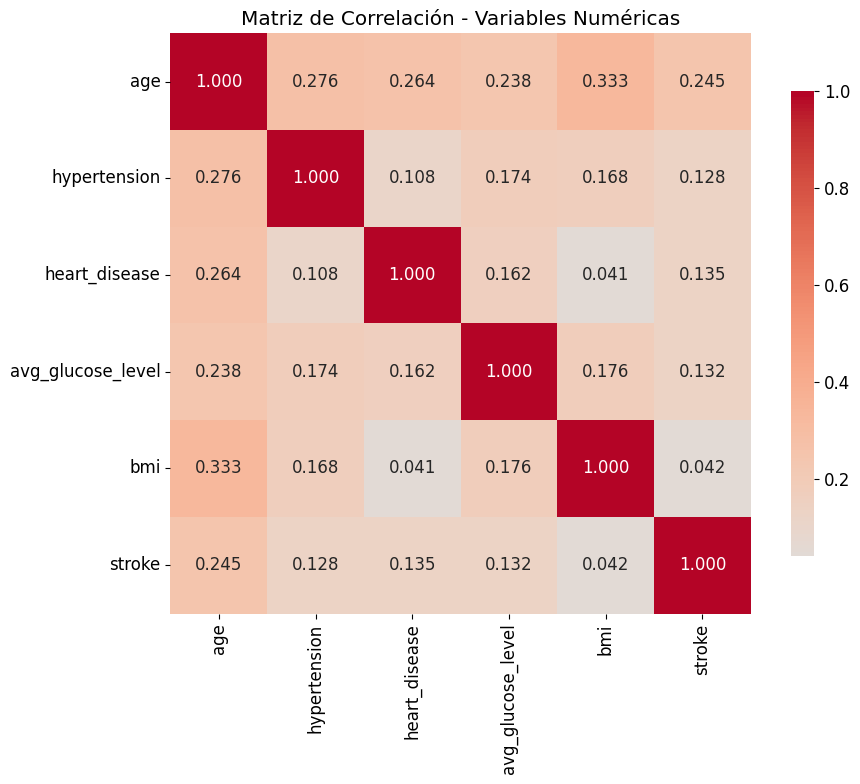

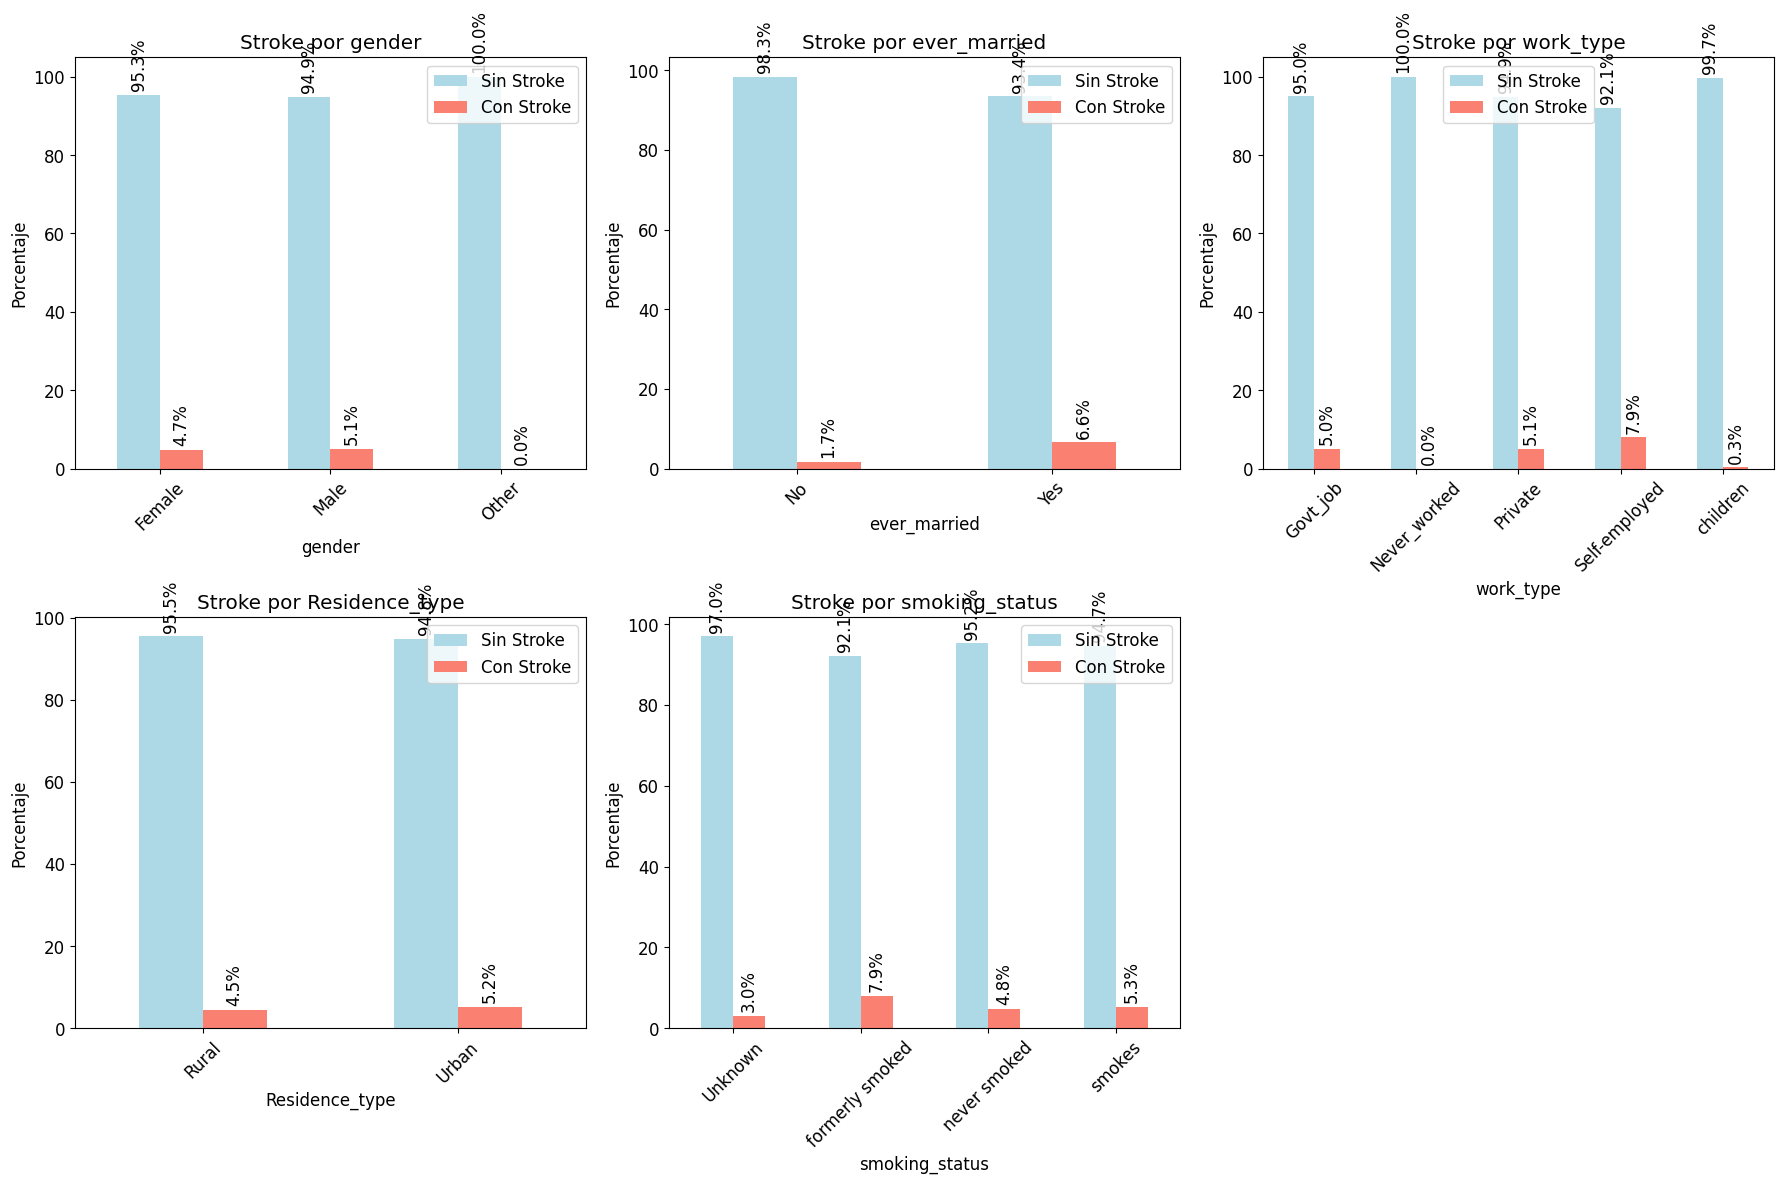

In [16]:
# Análisis de correlación y relación con stroke
# Crear matriz de correlación para variables numéricas
correlation_vars = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
corr_matrix = df[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

# Análisis de relación entre variables categóricas y stroke

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(categorical_vars):
    if i < len(axes):
        # Crear tabla de contingencia
        contingency_table = pd.crosstab(df[var], df['stroke'], normalize='index') * 100
        
        # Gráfico de barras apiladas
        contingency_table.plot(kind='bar', ax=axes[i], color=['lightblue', 'salmon'])
        axes[i].set_title(f'Stroke por {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Porcentaje')
        axes[i].legend(['Sin Stroke', 'Con Stroke'])
        axes[i].tick_params(axis='x', rotation=45)
        
        # Agregar valores en las barras
        for container in axes[i].containers:
            axes[i].bar_label(container, fmt='%.1f%%', rotation=90, padding=3)

# Ocultar el último subplot si no se usa
if len(categorical_vars) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


## Conclusiones del Análisis Exploratorio

### Hallazgos Principales:

1. **Dataset Desbalanceado**: Solo el 4.9% de los casos presentan stroke, lo que requiere técnicas especiales de balanceo.

2. **Valores Faltantes**: La variable `bmi` tiene algunos valores faltantes que necesitan ser manejados.

3. **Variables Categóricas**: 
   - Género: Mayoría femenina (59%)
   - Estado civil: Mayoría casada (65%)
   - Tipo de trabajo: Principalmente privado (57%)

4. **Variables Numéricas**:
   - Edad promedio: ~43 años
   - BMI promedio: ~28.9 (sobrepeso)
   - Glucosa promedio: ~106 mg/dL

5. **Correlaciones Significativas**:
   - Edad vs Stroke: Correlación positiva moderada
   - Hipertensión vs Stroke: Correlación positiva
   - Enfermedad cardíaca vs Stroke: Correlación positiva